# SUPERVISIED MACHINE LEARNING (LINEAR REGRESSION)


### The Sparks Foundation
### DSBA (Data Science and Buisness Analytics)

### GRIPJUNE21

### Task 1:-Predict the percentage of an student based on the no of study hours


## Author:- Vanita Khade

In [1]:
#import the Libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the data from the link provided in GRIP Task pd

In [3]:
#to load the dataset
link="http://bit.ly/w-data"  #dataset url
s_data=pd.read_csv(link)
print("Data is successfully imported")


Data is successfully imported


In [4]:
s_data.head(9)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81


In [5]:
s_data.tail(9)

,Hours,Scores
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
#shape gives the shape of an array
s_data.shape

(25, 2)

In [7]:
#describe()function shows count,mean,std,minimum,percentiles & maximum
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
#info() function to get information about the data
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [9]:
s_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### In the dataset there are 25 students,study hours and marks are already given,we have to predict the percentage of students based on number of hours the student studies.

#### DATA VISUALIZATION

##### To plot score distribution


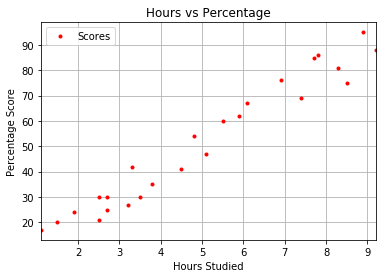

In [10]:
s_data.plot(x='Hours', y='Scores', style='r.')
plt.title('Hours vs Percentage') 
plt.xlabel('Hours Studied') 
plt.ylabel('Percentage Score') 
plt.grid(True) 
plt.show()

#### Conclusion = The graph clearly shows positive linear relation between number of hours studied and percentage of score

#### PREPARING THE DATA

In [11]:
X = s_data.iloc[:, :-1].values
y = s_data.iloc[:, 1].values

#### Splitting the data using train test split 

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=0)

#### TRANING THE ALGORITHM

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("training complete.")

training complete.


#### plot the test data 

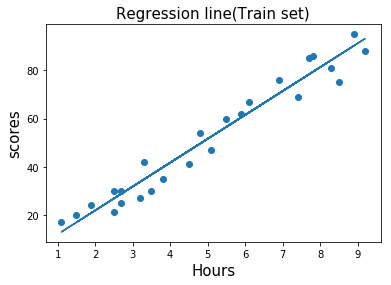

In [14]:
line = regressor.coef_*X+regressor.intercept_

plt.scatter(X,y)
plt.plot(X,line);
plt.xlabel("Hours",fontsize=15)
plt.ylabel("scores",fontsize=15)
plt.title("Regression line(Train set)",fontsize=15)
plt.show()

#### calculating the accuracy of model on train dataset

Train set score
0.9515510725211553


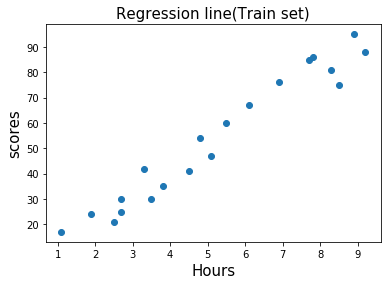

In [15]:
plt.scatter(X_train,y_train)
print("Train set score")
print(regressor.score(X_train,y_train))
plt.xlabel("Hours",fontsize=15)
plt.ylabel("scores",fontsize=15)
plt.title("Regression line(Train set)",fontsize=15)
plt.show()

#### calculating the accuracy of model on test dataset 

Test Score
0.9454906892105354


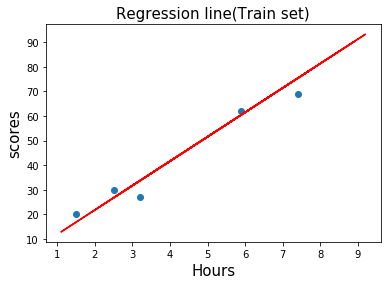

In [18]:
print("Test Score")
print(regressor.score(X_test,y_test))
plt.scatter(X_test,y_test)
plt.plot(X_train,regressor.predict(X_train),color="r")
plt.xlabel("Hours",fontsize=15)
plt.ylabel("scores",fontsize=15)
plt.title("Regression line(Train set)",fontsize=15)
plt.show()

#### making prediction 

In [19]:
print(X_test) #Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


#### comparing actual vs predited scores 

In [20]:
df = pd.DataFrame({'Actual': y_test, 'predicted': y_pred})
df

,Actual,predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### calculating the predicting score of the model 

In [21]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


#### calculating mean absolute error of the module 

In [22]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('R2 Score:',metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 4.183859899002982
R2 Score: 0.9454906892105354


### So,we can conclude that is a student studies 9.25 hourrs a day his predicted score will be 93.69%. 